In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import torch
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch # Twice the power!!
%load_ext autoreload
%autoreload 2
%matplotlib inline

mpl.rc('figure', max_open_warning = 0)

In [2]:
import helpers.pytorch_helpers as pytorch_helpers
import grading.save_student_results as save_student_results

# Graded Exercise Session 2 

**Date: 10.12.2021**

Welcome to the second graded exercise session. 

You are asked to fill in the code in a few cells throughout the exercise. At the end of each cell where we ask you to fill in some code, you will notice a call to a function from the `save_student_results` module. This ensures that the body of your function is run with pre-generated data and your current results are saved to a file (which you will eventually submit to Moodle). The cells are independent of each other and you will receive points for each individual cell. We will not grant partial points within a cell.

Before you finish, please make sure to **upload two files to Moodle**:
* **graded_exercise_2.ipynb**
* **answers_SCIPER.npz (e.g. "answers_280595.npz")**

Good luck! :)

In [3]:
sciper_number = 342296  # e.g. 123456
save_student_results.initialize_res(locals())

### Helper functions

In [4]:
def printMethods(obj):
    for m in dir(obj):
        if not m.startswith("_"):
            print(m)

## Part 1. MLP: 

In this part, we will be testing an already trained two-layered MLP. 

First let's warm up by coding the `tanh` activation function. This activation function is defined as:

\begin{align}
\text{tanh}(z) = \frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}
\end{align}

Its gradient is defined as:

\begin{align}
\frac{d\text{tanh}(z)}{dz} = 1-(\text{tanh}(z))^2
\end{align}

Now, let's code!

In [5]:
class Tanh:
    @staticmethod
    def forward(z):
        ### YOUR CODE HERE
        return (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))
        
    @staticmethod
    def gradient(z):
        ### YOUR CODE HERE
        return 1 - Tanh.forward(z)**2
    
save_student_results.save_tanh(locals())

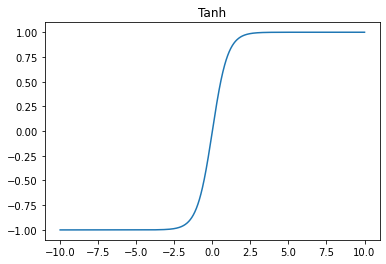

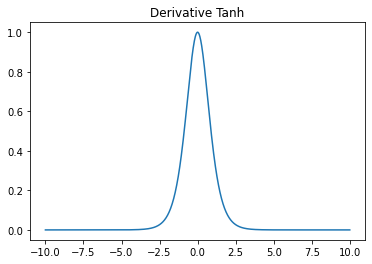

In [6]:
# Let's test whether our functions work
z = np.linspace(-10,10,1000)
T = Tanh.forward(z)
dT_dz = Tanh.gradient(z)

plt.plot(z, T)
plt.title('Tanh')
plt.show()

plt.plot(z, dT_dz)
plt.title('Derivative Tanh')
plt.show()

Now let's define the following neural network: 
* The first layer (input layer): Our network will take an input of 5 dimensions.
* Hidden layer 1: 10 nodes.
* Hidden layer 2: 12 nodes. 
* Final layer (output layer): Our network returns an output of 3 dimensions. 

Below, we provide an image depicting this network. (If there is no image showing in your notebook, check the helpers folder for mlp.png).

![MLP](helpers/mlp.png)


In [7]:
def forward_pass (X, weights1, bias1, weights2, bias2, weights3, bias3, activation=Tanh):
    """
        Forward pass of our MLP, using current weights and biases. Returns the output of the network.
        Parameters:
            X (np.array): Input, of shape (N,D_input), where D_input=5. 
            weights1 (np.array): Weights between the input layer and hidden layer 1, of shape (5,10)
            bias1(np.array): Bias of hidden layer 1 of shape (10,)
            weights2 (np.array): Weights between hidden layer 1 and hidden layer 2, of shape (10,12)
            bias2(np.array): Bias of hidden layer 2 of shape (12,)
            weights3 (np.array): Weights between hidden layer 2 and the output layer, of shape (12,3)
            bias3(np.array): Bias of layer 3, of shape (3,)

        :return:
            output (np.array): Output, of shape (N,D_output), where D_output=3
    """
    ## YOUR CODE HERE
    X = activation.forward(np.dot(X,weights1) + bias1)
    X = activation.forward(np.dot(X,weights2) + bias2)
    X = activation.forward(np.dot(X,weights3) + bias3)
    return X

save_student_results.save_forward_pass(locals())

In [8]:
## A quick test

X = np.random.normal(0,1,(100,5))
weights1 = np.random.normal(0,1,(5,10))
bias1 = np.random.normal(0,1,(10,))
weights2 = np.random.normal(0,1,(10,12))
bias2 = np.random.normal(0,1,(12,))
weights3 = np.random.normal(0,1,(12,3))
bias3 = np.random.normal(0,1,(3,))

out = forward_pass(X, weights1, bias1, weights2, bias2, weights3, bias3, Tanh)
print("This shape should be (100,3):", out.shape)



This shape should be (100,3): (100, 3)


## Part 2. Optimization Using PyTorch

As discussed during a previous exercise session, PyTorch allows for automatic differentiation of standard mathematical operations. In other words, gradients of standard operations are computed automatically. Gradient descent can thus be performed very easily, without having to manually define or compute gradients.

In this exercise, we exploit this to minimize a toy 1D function $f$ that is differentiable:
\begin{align*}
f: & \mathbb{R} \rightarrow \mathbb{R} \\ 
 & x \mapsto f(x)
\end{align*}

The goal is to find $x^*$ such that $f(x^*)$ is a local minimum. Such an $x^*$ can be numerically estimated by using gradient descent. Starting from $x_0 \in \mathbb{R}$, we iteratively update it for $k \leq K$ steps using
$$
x_{k+1} = x_k - \eta \cdot f'(x_k)
$$
where the scalar $\eta$ is the learning rate.

PyTorch automates for us both the computation of the derivative $f'(x_k)$, and the gradient descent step.

### 1. Implement a function in pytorch

The goal is to code the following formula: 

$$
f(x) = \frac{\sin(3.14 x)}{|x|+1} + 2\exp\big({-\frac{(x-4.5)^2}{2}}\big)
$$

For computing $\sin(\cdot)$ and $\exp(\cdot)$, you must **use PyTorch functions** ```torch.sin``` and ```torch.exp``` instead of the numpy ones (```np.sin``` and ```np.exp```). Using PyTorch versions of these functions allows it to compute gradients, which numpy does not do.

If the formula is implemented correctly, you must get the following plot:

![func](helpers/func.png "Function to code")

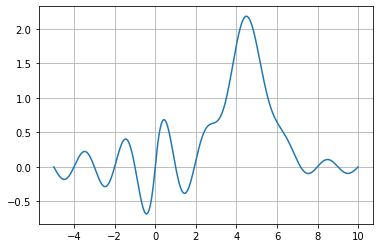

In [9]:
def f(x):
    ### YOUR CODE HERE
    first_term = torch.sin( 3.14*x ) / (abs(x) + 1)
    second_term = 2 * torch.exp( -(x - 4.5)**2/2 )
    ###
    
    return first_term + second_term
    ###

## Save results for grading
save_student_results.f(locals())
    
# And plot it
pytorch_helpers.plot_function(f)

### 2. Initialize the starting point and the optimizer

We need to define one PyTorch tensor storing the value of $x_0$, as well as the optimizer for doing gradient descent steps. 
The goal is to code an `init_x_and_optim` function that does both. This function returns:

* One initial point:
    - The `float` value of $x_0$ that must be converted to a `torch.tensor` (equivalent to a numpy array, but in pytorch).
    - By default, all newly created tensors in PyTorch do not require gradients computation. For the gradient to be computed, you need to manually set the `requires_grad` attribute to True.
* One optimizer, handling the gradient descent steps for us:
    - In this exercise, we use a predefined Stochastic Gradient Descent (SGD) optimizer from PyTorch, created using ```torch.optim.SGD(...)```. As the parameters to optimize, we pass the values of $x_0$
    
    
More generally, PyTorch [documentation and examples](https://pytorch.org/docs/stable/optim.html) on how to perform one gradient descent can be very useful (for this part, you are allowed to look at this webpage)! Also, don't hesitate to look at the previous exercise sessions which also used PyTorch.

We have provided the implementation for you.

In [10]:
def init_x_and_optim(x_0_value, lr):
    """
    Define one initial value and associated optimizer with a given learning rate.
    
    Inputs:
        x_0_value : float, the initial value of x_0
        lr : float, optimizer's learning rate
    Outputs:
        x_0 : torch tensor of shape (1), whose single value is x_0_value
                x_0 must have attribute .requires_grad = True
        opt : torch SGD optimizer on the x_0 tensor, with learning rate lr
    """
    # Create a pytorch tensor (equivalent to numpy array)
    # of one single element, whose value is x_0_value
    x_0 = torch.tensor([x_0_value])
    
    # If you have not already done it while initializing x_0 above,
    # tell pytorch we are interested in getting the gradients of this tensor
    x_0.requires_grad = True
    
    # Initialize one optimizer: SGD, whose goal is to optimize x_0, using learning rate lr
    opt = torch.optim.SGD([x_0], lr=lr)
    
    return x_0, opt

## 3. Minimize the function

The goal of this part is to write a routine to minimize the function $f$ via automatic gradient computation in PyTorch. If the function is implemented correctly, you must get the following descent plot (from $x_0$ in blue to $x_{final}$ in red):

![func](helpers/descent.png "Function to code")

In [11]:
X_0_VALUE = 3. # initial point of x
LR = 0.01 # learning rate
NUM_STEPS = 1000 # number of gradient steps

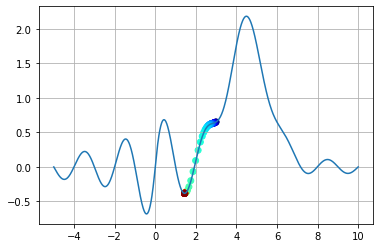

In [12]:
# Gradient descent loop encapsulated in a function
def minimize(f, x_0, opt, n_steps):
    """
    Inputs:
        f : function R -> R whose output we want to minimize using gradient descent
        x_0 : torch tensor of shape (1), whose single value is the initial guess for minimizing f
                x_0 must have attribute .requires_grad = True
        opt : torch SGD optimizer on the x_0 tensor
        n_steps : int, the number of gradient descent steps to perform
    Outputs:
        trace : list containing n_steps pairs representing the successive
                inputs and outputs to f during the descent:
                    [(x_0, f(x_0)), (x_1, f(x_1)), ...., (x_{n_steps}, f(x_{n_steps}))]
                WARNING: Each tuple is a tuple of python floats, not torch tensors
                From a torch tensor x containing a single value, the corresponding value
                can be obtained via x.item()     
    """
    # For accumulating points during the descent
    trace = []
    
    # Iterate for n_steps:
    for k in range(n_steps):
        # Initialize the gradients to zero
        ### YOUR CODE HERE
        opt.zero_grad()
        ###

        # Compute the function's output
        ### YOUR CODE HERE
        y = f(x_0)
        ###
        
        # Ask pytorch to compute the gradient: we want to minimize y
        ### YOUR CODE HERE
        y.backward()
        ###


        # Do one step of gradient descent with opt
        ### YOUR CODE HERE
        opt.step()
        ###

        
        # Accumulate the current (x,f(x)) point
        trace.append((x_0.item(), y.item()))
    
    return trace


## Save results for grading
save_student_results.minimize(locals())


# Initialize the optimization
x_0, optimizer = init_x_and_optim(X_0_VALUE, LR)
# Do the actual minimization
optimization_trace = minimize(f, x_0, optimizer, NUM_STEPS)
# We plot the descent on the graph of f
# (only for 1/10th of the trace points)
pytorch_helpers.plot_descent(f, optimization_trace[::10])

## 4. Maximize the function

PyTorch can very easily be used to perform gradient **ascent**, i.e., to maximize a function. With code very similar to what you wrote in the first part of the exercise for minimizing function $f$, you are now asked to maximize it.

The initialization step (creating an initial tensor and optimizer) is the same and does not need to be recoded. However, ```minimize()``` was coded to perform gradient descent. Now, with only a slight variation, you are asked to code ```maximize()```, to perform gradient ascent.

*Hint*: maximizing a function $f$ is equivalent to minimizing $-f$. 

If the function is implemented correctly, you must get the following ascent plot (from $x_0$ in blue to $x_{final}$ in red):

![func](helpers/ascent.png "Function to code")



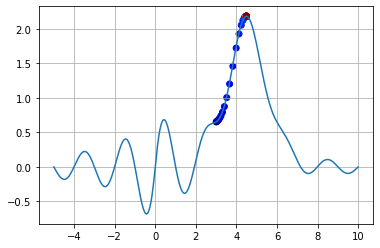

In [13]:
# Gradient ASCENT loop encapsulated in a function
def maximize(f, x_0, opt, n_steps):
    """
    Inputs:
        f : function R -> R whose output we want to minimize using gradient ascent
        x_0 : torch tensor of shape (1), whose single value is the initial guess for maximizing g
                x_0 must have attribute .requires_grad = True
        opt : torch SGD optimizer on the x_0 tensor
        n_steps : int, the number of gradient ascent steps to perform
    Outputs:
        trace : list containing n_steps 2-tuples representing the successive
                inputs and outputs to f during the ascent:
                    [(x_0, f(x_0)), (x_1, f(x_1)), ...., (x_{n_steps}, f(x_{n_steps}))]
                WARNING: Each tuple is a tuple of python floats, not torch tensors
                From a torch tensor x containing a single value, the corresponding value
                can be obtained via x.item()     
    """
    # For accumulating points during the ascent
    trace = []
    
    # Iterate for n_steps:
    for k in range(n_steps):
        # Initialize the gradients
        ### YOUR CODE HERE
        opt.zero_grad()
        ###

        
        # Compute the function's output
        ### YOUR CODE HERE
        y = f(x_0)
        ###
    
        
        # Compute the gradient: we want to MAXIMIZE y, ie. MINIMIZE (-y)
        ### YOUR CODE HERE
        (-y).backward()
        ###

        
        # Do one step of gradient descent
        ### YOUR CODE HERE
        opt.step()
        ###

        
        # Accumulate the current (x,g(x)) point
        trace.append((x_0.item(), y.item()))
    return trace


## Save results for grading
save_student_results.maximize(locals())


# Initialize the optimization
x_0, optimizer = init_x_and_optim(X_0_VALUE, LR)
# Do the actual maximization
optimization_trace = maximize(f, x_0, optimizer, NUM_STEPS)
# We plot the ascent on the graph of f
# (only for 1/10th of the trace points)
pytorch_helpers.plot_descent(f, optimization_trace[::10])

## Part 3. Bag of Words Representation

### 1. Load the dataset

In this exercise, we ask you to represent texts as vectors using Bag of Words (BoW). Our dataset $R=\{r_i\}_{i=0}^{N-1}$ consists of $N$ movie reviews $r_i$. Each review ${r_i}$ is encoded as a list of words. Our aim is to construct an $N \times K$ BoW representation array $X$, where $K$ is the number of unique words in the whole dataset.

First let us begin by running the following cells to load the dataset. **You do not need to implement anything in this first section.**

In [14]:
import csv
import string

# Read the dataset and clean it
with open('helpers/IMDB_Dataset_subset_0_cleaned.csv') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    reviews_org = []
    for review, sentiment in csvreader:
        reviews_org.append(review)

# Index for the example review
idx = 0
print("Here is an example review:\n {}".format(reviews_org[idx]))

Here is an example review:
 one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wou

#### We split each review as list of words and  exclude the words that contains digits 


In [15]:
def containsNumber(value):
    for character in value:
        if character.isdigit():
            return True
    return False

reviews_no_digits = []
for review in reviews_org:
    review_split = [ r for r in review.split() if not containsNumber(r)]
    reviews_no_digits.append(review_split)

reviews = reviews_no_digits

idx = 0
print("And this is the same example after we preprocess it:\n {}".format(reviews[idx]))
print("Number of words in the example review : {}\n".format(len(reviews[idx])))
print("The number of samples (i.e., reviews) in our dataset is:", len(reviews))

And this is the same example after we preprocess it:
 ['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', 'oz', 'episode', 'youll', 'be', 'hooked', 'they', 'are', 'right', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me', 'the', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', 'trust', 'me', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', 'this', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', 'sex', 'or', 'violence', 'its', 'is', 'hardcore', 'in', 'the', 'classic', 'use', 'of', 'the', 'word', 'it', 'is', 'called', 'oz', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'it', 'focuses', 'mainly', 'on', 'emerald', 'city', 'an', 'experimental', 'section', 'of', '


### 2. Bag of Words for each review

In this part, you are given a ready function that represents each review as BoWs. The function generates a list $B = \{b_i\}_{i=0}^{N-1}$. The elements of $B$ are entries of the form $b_i = \{\tilde{w}_{i}^{(j)} : m_{i}^{(j)}\}_{j=0}^{\tilde{C}_i-1}$, where $\tilde{C}_i$ is the number of unique words in $r_i$, $\tilde{w}_{i}^{(j)}$ is the j-th unique word in review $r_i$ and $m_{i}^{(j)}$ is the number of times the word $\tilde{w}_{i}^{(j)}$ occurs in review $r_i$.

For example, for the following raw inputs:

["Machine machine learning learning machine. Is is is. Really fun really fun fun fun fun.",
"Machine learning. is is. Awesome awesome"]

You have the pre-processed inputs:

[['machine', 'machine', 'learning', 'learning', 'machine', 'is', 'is', 'is', 'really', 'fun', 'really', 'fun', 'fun', 'fun', 'fun'],
['machine', 'learning', 'is', 'is', 'awesome', 'awesome']]

The resulting list should look like:

[{'machine': 3, 'learning': 2, 'is': 3, 'really':2, 'fun':5}, {'machine': 1, 'learning': 1, 'is': 2, 'awesome': 2}]

**You do not need to implement anything in this section either.** You need to use the function below in the following parts. Let's see the output of the function.

#### Implementation is given below

In [16]:
def generate_bow(reviews):
    """
    Represents each review as Bag of Words (BoW). 
    Creates a list of (key,value) pairs, where a key is a unique word in the input sentence and the corresponding value is the number of occurences of this word
    
    Parameters: 
        reviews (List): List of sentences, where each sentence is also a list of words.
    Returns:
        bow_list (List): List of dictionaries, where each dictionary is a Bag of Words representing the corresponding sentence.
    
    """
    bow_list = []
    for review in reviews:
        bow_review = {}
        for word in review:
            if word not in bow_review.keys():
                bow_review[word] = 1
            else:
                bow_review[word] += 1
        bow_list.append(bow_review)
    return bow_list

dummy_reviews = [['machine', 'machine', 'learning', 'learning', 'machine', 'is', 'is', 'is', 'really', 'fun', 'really', 'fun', 'fun', 'fun', 'fun'],
['machine', 'learning', 'is', 'is', 'awesome', 'awesome']]
dummy_bow_list = generate_bow(dummy_reviews)
print(dummy_bow_list)



[{'machine': 3, 'learning': 2, 'is': 3, 'really': 2, 'fun': 5}, {'machine': 1, 'learning': 1, 'is': 2, 'awesome': 2}]


In [17]:
## Let's test this:
bow_list = generate_bow(reviews)
print("Here is the Bag of Words representation of the example review we picked in the beginning:\n {}".format(bow_list[idx]))

Here is the Bag of Words representation of the example review we picked in the beginning:
 {'one': 1, 'of': 7, 'the': 16, 'other': 2, 'reviewers': 1, 'has': 1, 'mentioned': 1, 'that': 4, 'after': 1, 'watching': 2, 'just': 2, 'oz': 5, 'episode': 2, 'youll': 1, 'be': 2, 'hooked': 1, 'they': 1, 'are': 2, 'right': 2, 'as': 4, 'this': 3, 'is': 9, 'exactly': 1, 'what': 2, 'happened': 1, 'with': 5, 'me': 4, 'first': 2, 'thing': 1, 'struck': 2, 'about': 1, 'was': 3, 'its': 2, 'brutality': 1, 'and': 6, 'unflinching': 1, 'scenes': 1, 'violence': 4, 'which': 1, 'set': 1, 'in': 3, 'from': 1, 'word': 2, 'go': 1, 'trust': 1, 'not': 5, 'a': 3, 'show': 3, 'for': 5, 'faint': 1, 'hearted': 1, 'or': 3, 'timid': 1, 'pulls': 1, 'no': 1, 'punches': 1, 'regards': 1, 'to': 6, 'drugs': 1, 'sex': 1, 'hardcore': 1, 'classic': 1, 'use': 1, 'it': 6, 'called': 1, 'nickname': 1, 'given': 1, 'oswald': 1, 'maximum': 1, 'security': 1, 'state': 1, 'penitentary': 1, 'focuses': 1, 'mainly': 1, 'on': 3, 'emerald': 1, 'city

### 3 Creating a common dictionary of unique words for the whole dataset

In this part, given the BoW representations $B$ from the previous part and a list of stopwords $S$, you are asked to create a common dictionary $D$ that includes the unique words used in the whole dataset (without repetition), discarding the stopwords in $S$. The dictionary $D$ should map each word $\hat{w}_k$ to an unique integer index $k$:  $D = \{\hat{w}_k : k\}_{k=0}^{K-1}$. Note that the keys in dictionary $D$ can be arranged in any order. In other words, each word in dictionary is mapped into an unique integer k and order of words is not important.

If our dataset was consisting of the two sentences provided in the beginning, the input BoW representation would look like:

[{'machine': 3, 'learning': 2, 'is': 3, 'really': 2, 'fun': 5}, {'machine': 1, 'learning': 1, 'is': 2, 'awesome': 2}]

We can take the stopwords as:

['am', 'is', 'are']

The output can look like:

{'machine': 0, 'learning': 1, 'really': 2, 'fun': 3, 'awesome': 4 }

Since the keys in dictionary can be stored in any order, for example, the output can also stored as:
{'learning': 0, 'machine': 1, 'fun': 2, 'really': 3,   'awesome': 4} and in many other ways such that index associated with each word is unique.


**This function will be implemented by you.**

#### Implement the function below

In [18]:
def construct_dictionary(bow_list, stopwords):
    """
    Constructs a common dictionary consisting of the unique words found in the bow_list and omits the stop words. Keys of the dictionary are words and values are integer indices starting from 0 and increasing for each new entry in the dictionary.
    
    Parameters: 
        bow_list (List): List of BoW representations for N sentences.
        stopwords (List): List of words to be omitted when constructing the dictionary
    Returns:
        dictionary (Dict): A dictionary of unique words, where the keys are the words and the values are integer indices of the words
    """ 
    
    ##YOUR CODE HERE
    dictionary = {}
    for bow in bow_list:
        for word, count in bow.items():
            if word not in stopwords:
                dictionary[word] = dictionary.get(word,0) + count

    return dictionary

## Save results for grading
save_student_results.construct_dictionary(locals())


dummy_stopwords = ['am','is','are']
dummy_dictionary = construct_dictionary(dummy_bow_list, dummy_stopwords)
print(dummy_dictionary)

{'machine': 4, 'learning': 3, 'really': 2, 'fun': 5, 'awesome': 2}


In [19]:
stopwords = ['', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
                 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves',
                 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself',
                 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
                 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those',
                 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having',
                 'do', 'does', 'did', 'doing', 'a', 'an', 'the',
                 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while',
                 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through',
                 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
                 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once',
                 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
                 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only',
                 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just',
                 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'could', 'would',
                 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't",
                 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'might',
                 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't",
                 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

dictionary = construct_dictionary(bow_list, stopwords)


### 4. Vector representation of BoW

In this part, you are asked to encode each review as a vector representation of the corresponding BoW. 
Given the dictionary $D$ and the BoW representation $B$, we first define $\tilde{X} \in \mathbb{R}^{N \times K}$ and let its rows $\tilde{x}_i \in \mathbb{R}^{1 \times K}$ be the unnormalized BoW representation vector corresponding to $b_i$. That is, $\tilde{x}_i^{(k)}$ is the number of times word $\hat{w}_k$ from the dictionary appears in review $r_i$. Hence,


$$
\
    \tilde{x}_i^{(k)} =
\begin{cases}
    b_i[\hat{w}_k],& \text{if } \hat{w}_k \text{is in the keys of $b_i$} \\
    0,          & \text{otherwise}
\end{cases}
\
$$

Note that $b_i$ are dictionaries that relate words to number of occurences. When a word $w$ is used in review $r_i$, its BoW representation $b_i$ stores the number of occurences of that word $w$ as $b[w]$.

<!-- $$
b_i[w] = m_{i}^{(v)}, \text{if } \exists v \in \{0,...,\tilde{C}_i-1\} \text{ such that } w = \tilde{w}_i^{(v)} \in \{\tilde{w}_i^{(j)}\}_{j=0}^{\tilde{C}_i-1}
$$
 -->
Our aim then is to construct the normalized BoW representation array $X \in \mathbb{R}^{N \times K}$, whose rows are $x_i \in \mathbb{R}^{1 \times K}$, such that

$$
x_i^{(j)} = \frac{\tilde{x}_i^{(j)}} {\sum_{\ell=1}^{K} \tilde{x}_i^{(\ell)}}
$$

If we continue with the same example as before, using our dictionary:

{'machine': 0, 'learning': 1, 'really':2, 'fun':3, 'awesome':4 }

and the BoWs:

[{'machine': 3, 'learning': 2, 'is': 3, 'really': 2, 'fun': 5}, {'machine': 1, 'learning': 1, 'is': 2, 'awesome': 2}]

we obtain unnormalized BoWs vectors and normalized BoW vectors:

[[3, 2, 2, 5, 0], [1, 1, 0, 0, 2]] -> [[3/12, 2/12, 2/12, 5/12, 0/12], [1/4, 1/4, 0/4, 0/4, 2/4]]

Note that you should use the indices stored in values of $D$ to create the vector representations

#### Implement the function below

In [20]:
def get_bow_array(bow_list, dictionary):
    """
    Encodes each sentence as a vector representation of the input Bag of Words.
    
    Parameters: 
        bow_list (List): List of N BoW dictionaries.
        dictionary (Dict): A dictionary of K unique words, where keys are the words and values are integer indices in {0,...,K-1}
    Returns:
        X (np.array): Normalized BoW representation array of shape (N,K)
    """ 
    
    N = len(bow_list)
    K = len(dictionary)
    X_tilde = np.zeros((N, K))
    # WRITE YOUR CODE HERE
    
    for word, j in dictionary.items():
        for i in range(N):
            bow = bow_list[i]
            if word in bow and 0 <= i < N and 0 <= j < K:
                X_tilde[i][j] = bow[word]
    
    X_weights = np.sum(X_tilde, axis = 1)
    X = (X_tilde.T / X_weights).T

    return X

## Save results for grading
save_student_results.get_bow_array(locals())

dummy_bow_array = get_bow_array(dummy_bow_list, dummy_dictionary)
print(dummy_bow_array)

[[0.         0.         0.28571429 0.28571429 0.42857143]
 [0.         0.         0.5        0.25       0.25      ]]


In [21]:
bow_array = get_bow_array(bow_list, dictionary)

print(bow_array)

[[0.         0.02325581 0.02325581 ... 0.         0.         0.        ]
 [0.         0.03225806 0.03225806 ... 0.         0.         0.        ]
 [0.         0.02941176 0.02941176 ... 0.         0.         0.        ]
 ...
 [0.         0.025      0.05       ... 0.         0.         0.        ]
 [0.         0.02222222 0.04444444 ... 0.         0.         0.        ]
 [0.         0.03225806 0.06451613 ... 0.         0.         0.        ]]
